In [115]:
import pandas as pd

baseline = pd.read_csv (r'baseline.csv')
# baseline

In [116]:
#read in endline data
endline = pd.read_csv (r'my_data.csv')
#rename the identifyer column for a better merge
endline.rename(columns = {'unique_id':'uid'}, inplace = True)

#turn all the ids in lower case
endline['uid']= endline['uid'].str.lower()
baseline['uid']= baseline['uid'].str.lower()
#Merge the two dataframes
dataTouse = pd.merge(baseline, endline, on='uid', how='outer')


In [117]:
#merge the on camp location (cd_location) and the outside camp location (cd-location_otr) to get all the 
#location data in one column
dataTouse.cd_location.fillna(dataTouse.cd_location_otr, inplace=True)
del dataTouse['cd_location_otr']
# print(dataTouse['cd_location'].to_string())

In [118]:
#replace all the nan in location by "empty location" string
dataTouse.cd_location.fillna("empty location", inplace=True)

In [119]:
# trim the last three rows as they have unsufull data
dataTouse.drop(dataTouse.tail(3).index,
        inplace = True)

In [120]:
#Write data on a new csv to be used in power BI
dataTouse.to_csv(r'C:\Users\Public\fifth.csv', index=False)

<AxesSubplot:xlabel='cd_age'>

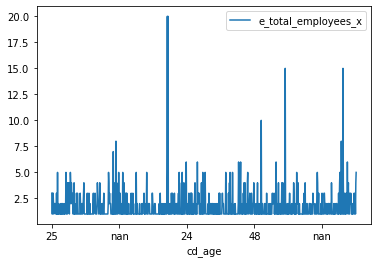

In [121]:
# the total number of employees by age other plots are done in power bi
dataTouse.plot(x='cd_age', y='e_total_employees_x')


In [122]:
# responding to question 1
endline

,uid,cd_gender,cd_nationality,cd_strata,cd_age,client_location,bd_location,cd_enum_name,consent,consent_yesno,...,bd_biz_failure_reasn_5,bd_biz_failure_reasn_6,bd_biz_failure_reasn_7,bd_biz_failure_reasn_8,bd_biz_failure_reasn_otr,refusal,otherpecify,end_comment,end_commentyes,thanks
0,unique_id,cd_gender,cd_nationality,cd_strata,cd_age,client_location,bd_location,cd_enum_name,consent,consent_yesno,...,bd_biz_failure_reasn_5,bd_biz_failure_reasn_6,bd_biz_failure_reasn_7,bd_biz_failure_reasn_8,bd_biz_failure_reasn_otr,refusal,otherpecify,end_comment,end_commentyes,thanks
1,7,Male,Kenyan,Host community entrepreneur,36,Kakuma town,Kakuma town,Khaltom Abdallar Abakar,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
2,8,Female,Kenyan,Host community entrepreneur,32,Kakuma town,Kakuma town,Losike Josephat,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,God bless AEC,NaN
3,part/ke16012104001,Male,Congolese,Refugee,25,Kakuma 2,Kakuma 2,Losike Josephat,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
4,part/ke16012104002,Male,Sudanese,Refugee,39,Kakuma 3,Kakuma 3,Ramla Abdullahi,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,I will be looking forward to your help.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,part/ke16012104896,Female,Somali,Refugee,45,Kakuma 3,Kakuma 3,Losike Josephat,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
534,part/ke16012104897,Female,Kenyan,Host,26,Kakuma Town,Kakuma Town,David Chol,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
535,part/ke16012104898,Male,Somali,Refugee,20,Kakuma 3,Kakuma 3,Losike Josephat,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN
536,part/ke16012104899,Female,Somali,Refugee,47,Kakuma 3,Kakuma 3,Losike Josephat,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN


In [123]:
# creating a dataframe with the uniqueid and the answers to the living condition change
# endline['uid']
# endline['liv_livingcond_change']
socresDataFrame = pd.DataFrame(columns=['ID', 'response'])
socresDataFrame.ID = endline['uid']
socresDataFrame.response = endline['liv_livingcond_change']
socresDataFrame 


,ID,response
0,unique_id,liv_livingcond_change
1,7,Yes
2,8,Yes
3,part/ke16012104001,NaN
4,part/ke16012104002,NaN
...,...,...
533,part/ke16012104896,No
534,part/ke16012104897,Yes
535,part/ke16012104898,Yes
536,part/ke16012104899,No


In [128]:
#we are going to assign scores by the answers of the following question 
# Do you feel that there is a change in household living conditions as a result of AEC-Ke loan?
#represented by the liv_livingcond_change  column

#for those who said no : detractors
# for those who said yes: promoters
#for those who with no answers : passive


def nps_bucket(x):
    if x == "Yes":
        bucket = 'promoter'
    elif x == "No":
        bucket = 'detractor'
    else:
        bucket = 'passive'
    return bucket

socresDataFrame['nps_bucket'] = socresDataFrame['response'].apply(nps_bucket)


In [129]:
socresDataFrame

,ID,response,nps_bucket
0,unique_id,liv_livingcond_change,passive
1,7,Yes,promoter
2,8,Yes,promoter
3,part/ke16012104001,NaN,passive
4,part/ke16012104002,NaN,passive
...,...,...,...
533,part/ke16012104896,No,detractor
534,part/ke16012104897,Yes,promoter
535,part/ke16012104898,Yes,promoter
536,part/ke16012104899,No,detractor


In [133]:
#calculating the percentages 
#All the entries

promoterNumber = 0
detractorNumber = 0
passiveNumber = 0

for x in socresDataFrame.nps_bucket:
    if x == "promoter":
        promoterNumber = promoterNumber + 1
    elif x == "detractor":
        detractorNumber = detractorNumber + 1
    else:
        passiveNumber = passiveNumber + 1
    


entries = len(socresDataFrame)

print(" total number of promoters :" + str(promoterNumber))
print(" total number of detractors :" + str(detractorNumber))
print(" total number of passiveNumber :" +str(passiveNumber))
print(" total number of entries :" +str(entries))

promoterPercentage = (promoterNumber/entries)*100
detractorPercentage = (detractorNumber/entries)*100
passivePercentage = (passiveNumber/entries)*100

print(" percentage number of promoters :" + str(promoterPercentage) + "%")
print(" percentage number of detractors :" + str(detractorPercentage) + "%")
print(" percentage number of passiveNumber :" + str(passivePercentage) + "%")

NPSscore = detractorPercentage - promoterPercentage

print ("NPSscore is "+ str (NPSscore))


 total number of promoters :140
 total number of detractors :70
 total number of passiveNumber :328
 total number of entries :538
 percentage number of promoters :26.022304832713754%
 percentage number of detractors :13.011152416356877%
 percentage number of passiveNumber :60.966542750929364%
NPSscore is -13.011152416356877


In [138]:
dataTouse['cd_location']

0      empty location
1      empty location
2      empty location
3      empty location
4      empty location
            ...      
897    empty location
898    empty location
899    empty location
900    empty location
901    empty location
Name: cd_location, Length: 902, dtype: object

In [140]:
#Qeustion 3
#Number of employees before 
# the chart is rendered in power BI

increseByStrataAndLocation = pd.DataFrame(columns=['ID', 'e_total_employees_before', 'e_total_employees_After','strata','location'])
increseByStrataAndLocation.ID = dataTouse['uid']
increseByStrataAndLocation.e_total_employees_before = baseline['e_total_employees']
increseByStrataAndLocation.e_total_employees_After = endline['e_total_employees']
increseByStrataAndLocation.strata = dataTouse['cd_strata']
increseByStrataAndLocation.location = dataTouse['cd_location']
increseByStrataAndLocation.to_csv(r'C:\Users\Public\increseByStrataAndLocation.csv', index=False)
